Text(0.5, 1.0, 'Value: 5')

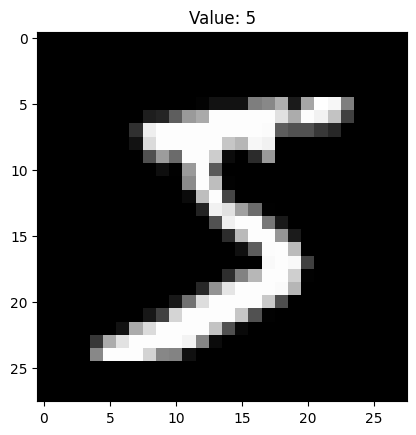

In [22]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # from [0,255] to [0,1] -- best for neural networks

plt.imshow(x_train[0], cmap="gray")
plt.title(f"Value: {y_train[0]}")

In [23]:
# MODEL 1: Random guess baseline (choosing random digits 0-9)
random_preds = np.random.randint(0, 10, size=y_test.shape)

random_accuracy = np.mean(random_preds ==  y_test)
print(f"Random Guessing Accuracy: {random_accuracy:.2%}")

Random Guessing Accuracy: 9.42%


In [24]:
# MODEL 2: basic model with no hidden layers (just input → output)

# 1. Define the layers:
#  - keras.Sequential groups a linear stack of layers
#  - keras.layer.Dense means we connect all 784 numbers in the input to each of the 10 outputs
#  - activation.softmax produces a probablity [0,1] for each of the 10 outputs -- needed for classification

naive_model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),  # Converts 28x28 to 1D (784,), as expected by the next layer
    keras.layers.Dense(10, activation="softmax") # Directly predicts probabilities for 10 digits
])

# 2. Compile/Prepare the Model
#  - sgd is a (stochastic) gradient descent optimizer to tweak weights during training
#  - for the loss function (that the model minimizes during traing),
#      sparse means labels are integers, and crossentropy means we compare the probablities to the true class (lower is better)
#  - the accuracy is (number of correct predictions) / (total predictions)
naive_model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# 3. Run the model and improve it
#  - epochs are the number of times we train on the whole training dataset
#  - improved weights are kept from one epoch to the next
#  - the outputs shows us the metric + loss, for both training and test data
naive_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 4. Print the model accuracy
naive_loss, naive_acc = naive_model.evaluate(x_test, y_test, verbose=2)
print(f"Naïve Model Accuracy: {naive_acc:.2%}")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7156 - loss: 1.1241 - val_accuracy: 0.8830 - val_loss: 0.4774
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8780 - loss: 0.4777 - val_accuracy: 0.8966 - val_loss: 0.3981
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8873 - loss: 0.4163 - val_accuracy: 0.9024 - val_loss: 0.3658
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8950 - loss: 0.3825 - val_accuracy: 0.9072 - val_loss: 0.3467
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9009 - loss: 0.3633 - val_accuracy: 0.9094 - val_loss: 0.3346
313/313 - 0s - 1ms/step - accuracy: 0.9094 - loss: 0.3346
Naïve Model Accuracy: 90.94%


In [21]:
# MODEL 3: Simple neural network (NN) (input → layer 1 → output)

# 1. Define the three layers
#  - note this time we have a middle layer with 128 nodes and a different activation function
simple_model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(), # Converts 28x28 to 1D (784,), as expected by the next layer
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 2. Compile and train the model
#  - swap "sgd" for "adam" and see what happens with the accuracy and speed
simple_model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
simple_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 3. Evaluate on test data
simple_loss, simple_acc = simple_model.evaluate(x_test, y_test, verbose=2)
print(f"Simple NN Accuracy: {simple_acc:.2%}")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7494 - loss: 0.9967 - val_accuracy: 0.9018 - val_loss: 0.3565
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9026 - loss: 0.3503 - val_accuracy: 0.9177 - val_loss: 0.2927
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9171 - loss: 0.2966 - val_accuracy: 0.9273 - val_loss: 0.2594
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9264 - loss: 0.2637 - val_accuracy: 0.9332 - val_loss: 0.2355
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9308 - loss: 0.2446 - val_accuracy: 0.9378 - val_loss: 0.2169
313/313 - 1s - 2ms/step - accuracy: 0.9378 - loss: 0.2169
Simple NN Accuracy: 93.78%


In [25]:
# MODEL 4: Multilayer perceptron (MLP) model (input → layer 1 → layer 2 → output)
mlp_model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
mlp_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
mlp_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
mlp_loss, mlp_acc = mlp_model.evaluate(x_test, y_test, verbose=2)
print(f"MLP Accuracy: {mlp_acc:.2%}")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8739 - loss: 0.4358 - val_accuracy: 0.9608 - val_loss: 0.1262
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9665 - loss: 0.1105 - val_accuracy: 0.9720 - val_loss: 0.0874
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9774 - loss: 0.0721 - val_accuracy: 0.9728 - val_loss: 0.0864
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9818 - loss: 0.0543 - val_accuracy: 0.9784 - val_loss: 0.0731
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9866 - loss: 0.0417 - val_accuracy: 0.9776 - val_loss: 0.0759
313/313 - 1s - 2ms/step - accuracy: 0.9776 - loss: 0.0759
MLP Accuracy: 97.76%


In [26]:
# MODEL 5: Convolutional Neural Network (CNN) -- the best for images, slower to train
#  - Conv2D slides 32 little 3×3 windows (filters) over the image to spot features like edges or curves
#  - MaxPooling2D shrinks the data by taking the maximum value in each 2×2 patch
cnn_model = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)), # add the channel, i.e., grayscale
    keras.layers.Conv2D(32, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(), # Converts (13, 13, 32) to (5408,)
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
cnn_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
x_train_cnn = x_train.reshape(-1, 28, 28, 1)  # add grayscale channel
x_test_cnn = x_test.reshape(-1, 28, 28, 1) # add grayscale channel
cnn_model.fit(x_train_cnn, y_train, epochs=5, validation_data=(x_test_cnn, y_test))
cnn_loss, cnn_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=2)
print(f"CNN Accuracy: {cnn_acc:.2%}")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9032 - loss: 0.3307 - val_accuracy: 0.9768 - val_loss: 0.0674
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9820 - loss: 0.0614 - val_accuracy: 0.9831 - val_loss: 0.0530
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.9889 - loss: 0.0390 - val_accuracy: 0.9822 - val_loss: 0.0560
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9909 - loss: 0.0282 - val_accuracy: 0.9822 - val_loss: 0.0551
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9947 - loss: 0.0173 - val_accuracy: 0.9843 - val_loss: 0.0450
313/313 - 2s - 5ms/step - accuracy: 0.9843 - loss: 0.0450
CNN Accuracy: 98.43%


The best model is 99.75% accuracy.